#Problem Statement:
Jamboree is a renowned educational institution that has successfully assisted numerous students in gaining admission to top colleges abroad. With their proven
problem-solving methods, they have helped students achieve exceptional scores on
exams like GMAT, GRE, and SAT with minimal effort. The current feature provides basic assessments, but Jamboree wants a more advanced solution that can deliver personalized, data-driven predictions based on various factors unique to Indian applicants. As a Data scientist our goal is predict "chance of admit" percentage of students based on features including GRE, TOEL scores, University Ratings (based on the university they are trying to apply) and their CGPA and Research scores.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

#Dowload Dataset

In [2]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
To: /content/Jamboree_Admission.csv
100% 16.2k/16.2k [00:00<00:00, 41.1MB/s]


In [3]:
df = pd.read_csv('Jamboree_Admission.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Checking null values

In [5]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
df.shape

(500, 9)

In [8]:
df.ndim

2

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


Dropping the Serial No column as its not much helpful to get insights

In [10]:
df.drop(['Serial No.'],axis = 1,inplace = True)

In [11]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


Grouping the University Ratings and checking their count

In [12]:
df_uni_count = df['University Rating'].value_counts(ascending = True)
df_uni_count

,count
University Rating,
1,34
5,73
4,105
2,126
3,162


In [13]:
df['University Rating'].isnull().sum()

0

In [14]:
df['Chance of Admit '].isnull().sum()

0

In [15]:
df['Chance'] = df.groupby('University Rating')['Chance of Admit '].mean()

In [16]:
df_bar = df[['University Rating','Chance of Admit ']]

In [17]:
df['Chance'].isnull().sum()

495

#Plotting Bar plot between University Ratinga and Chance of Admit

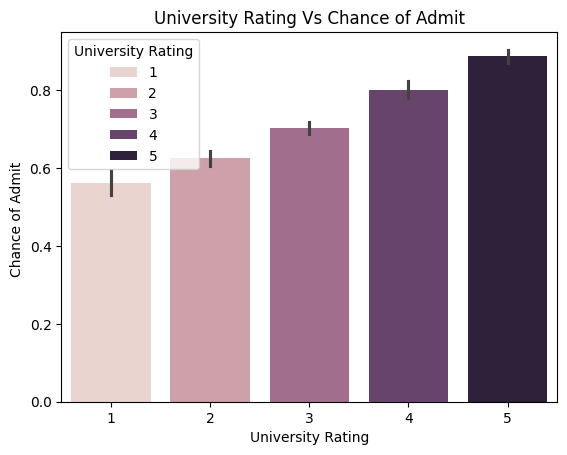

In [18]:
sns.barplot(x = 'University Rating',y = 'Chance of Admit ',data = df_bar, hue = 'University Rating')
plt.title('University Rating Vs Chance of Admit')
plt.show()

In [19]:
df_research = df.groupby('Research')[['Chance of Admit ','SOP']].mean()

In [20]:
df_research

,Chance of Admit,SOP
Research,,
0,0.634909,2.918182
1,0.789964,3.732143


Plot bweteen Research and Chance of Admit

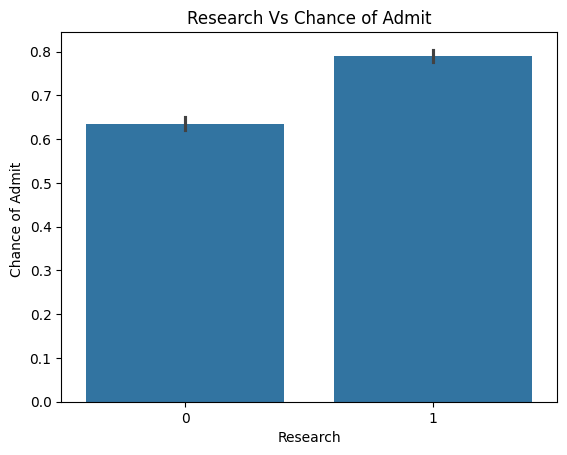

In [21]:
sns.barplot(x = 'Research',y = 'Chance of Admit ',data = df)
plt.title('Research Vs Chance of Admit')
plt.show()

Plot bweteen SOP and Chance of Admit

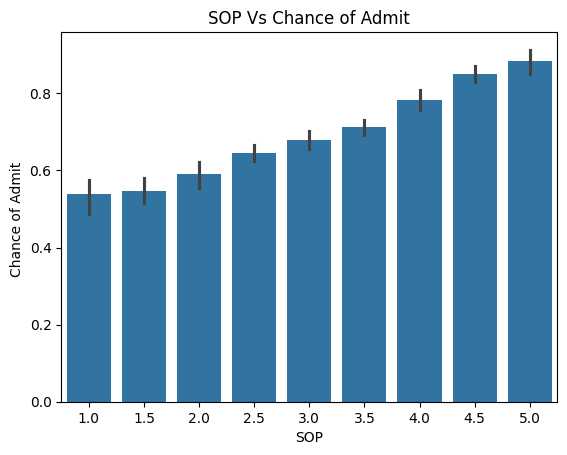

In [22]:
sns.barplot(x = 'SOP',y = 'Chance of Admit ',data = df)
plt.title('SOP Vs Chance of Admit')
plt.show()

Plot bweteen LOR and Chance of Admit

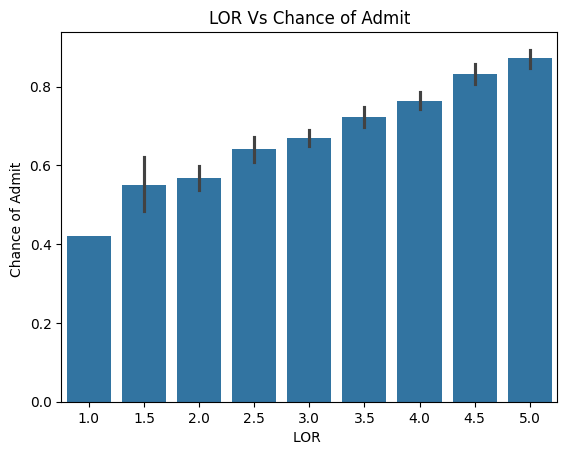

In [23]:
sns.barplot(x = 'LOR ',y = 'Chance of Admit ',data = df)
plt.title('LOR Vs Chance of Admit')
plt.show()

In [24]:
df_col = df.columns

Plotting Box plots for the columns to check if any outliers

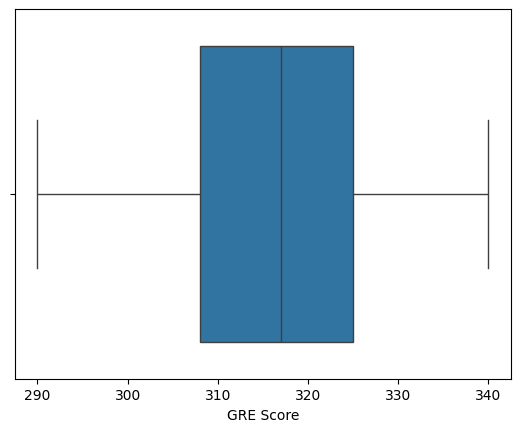

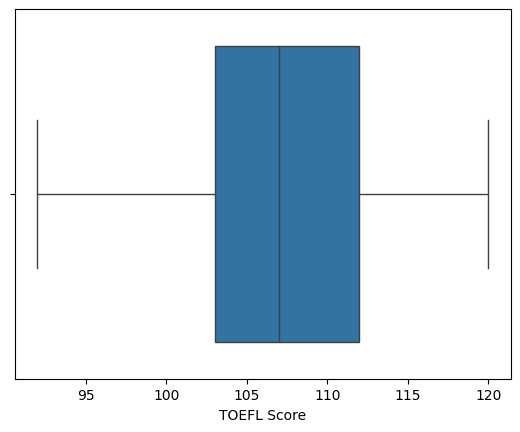

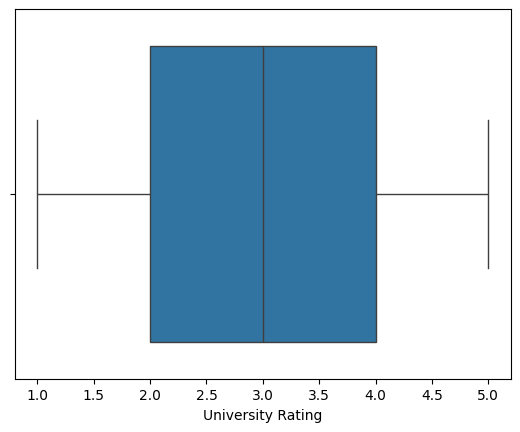

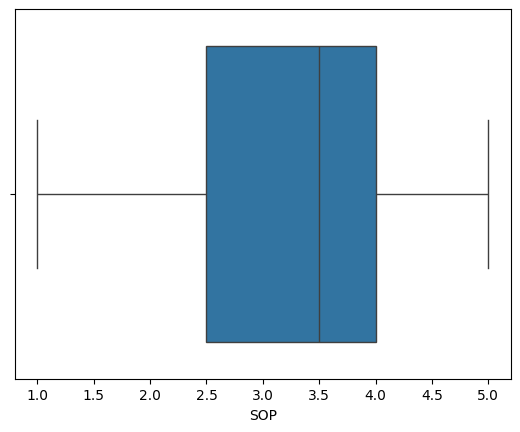

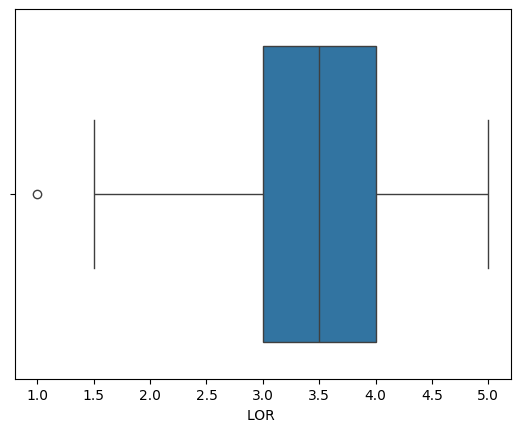

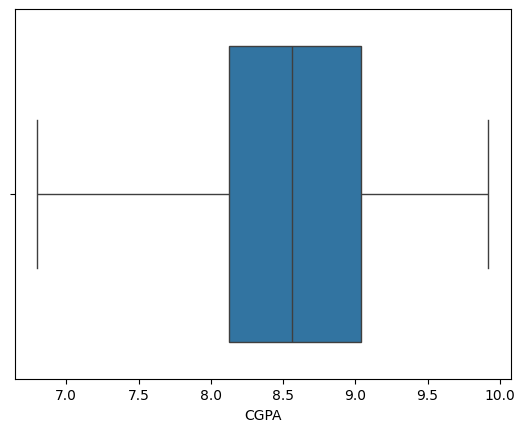

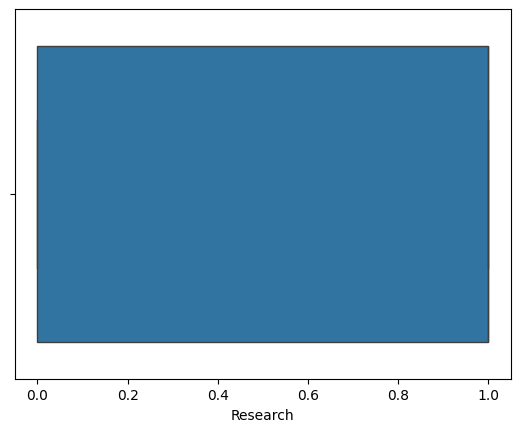

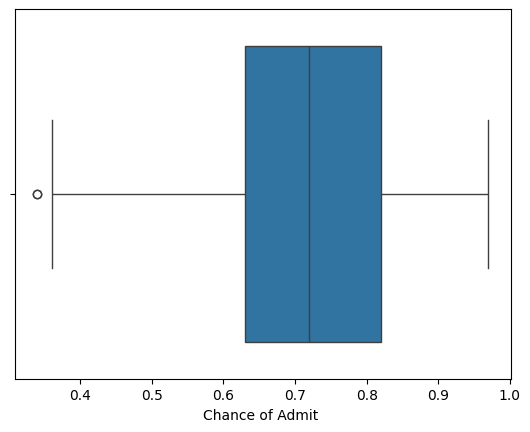

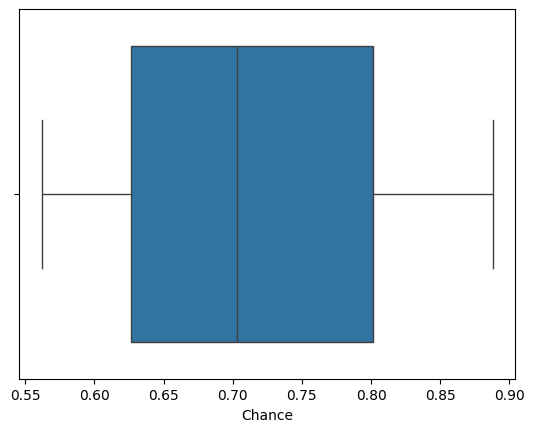

In [25]:
for i in df_col:
  sns.boxplot(x=df[i], data=df)
  plt.show()

In [26]:
cor = df.corr()

Correlation Matrix

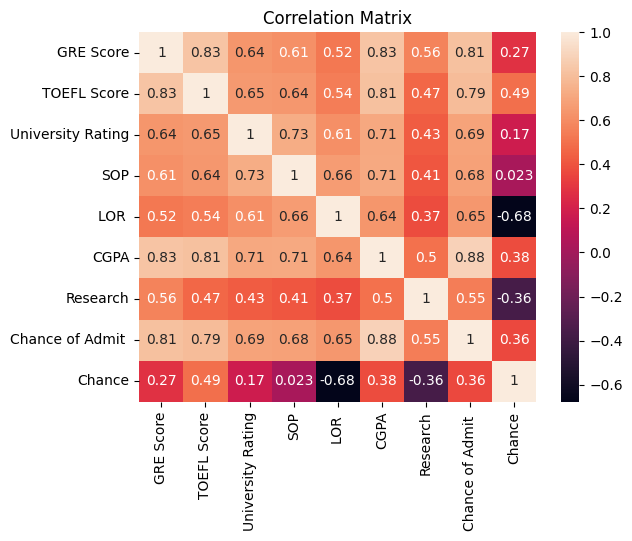

In [27]:
sns.heatmap(cor, annot = True, cmap = 'rocket')
plt.title('Correlation Matrix')
plt.show()

In [28]:
df.drop(['Chance'],axis = 1,inplace = True)

In [29]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [30]:
cor = df.corr()

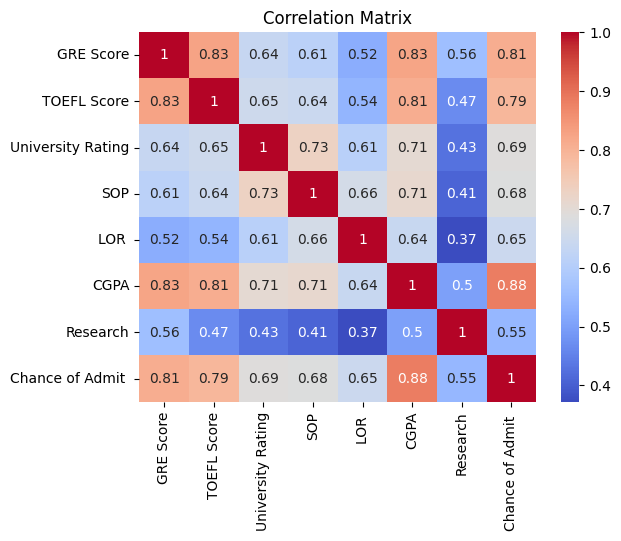

In [31]:
sns.heatmap(cor, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Scaling the Data with Standard Scaler

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
scaler.fit(df)

StandardScaler()

In [35]:
scaled_df = scaler.transform(df)

In [36]:
scaled_df = pd.DataFrame(scaled_df, columns = df.columns)

Scaled Dataframe using StandardScaler

In [37]:
scaled_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797
...,...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405,1.051495
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405,1.689797
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405,1.477030
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152,0.058582


In [38]:
scaled_cor = scaled_df.corr()

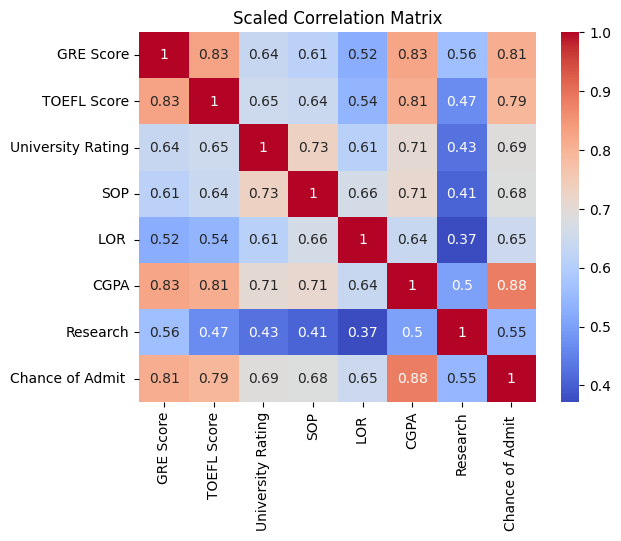

In [39]:
sns.heatmap(scaled_cor, annot = True, cmap = 'coolwarm')
plt.title('Scaled Correlation Matrix')
plt.show()

In [40]:
y = scaled_df['Chance of Admit ']

In [41]:
y

,Chance of Admit
0,1.406107
1,0.271349
2,-0.012340
3,0.555039
4,-0.508797
...,...
495,1.051495
496,1.689797
497,1.477030
498,0.058582


Dropping the target (y) from the Dataframe

In [42]:
scaled_df.drop(['Chance of Admit '],axis = 1,inplace = True)

In [43]:
scaled_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152
...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152


In [44]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)

Using stats model Summary

In [45]:
import statsmodels.api as sm

In [46]:
sm_data = sm.add_constant(X_train)

In [47]:
mod = sm.OLS(y_train, sm_data)

In [48]:
res = mod.fit()

In [49]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Wed, 09 Oct 2024   Prob (F-statistic):          3.41e-142
Time:                        17:57:06   Log-Likelihood:                -221.69
No. Observations:                 400   AIC:                             459.4
Df Residuals:                     392   BIC:                             491.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0077      0.02

In [50]:
y_pred = res.predict(sm.add_constant(X_test))

In [51]:
y_pred

,0
361,1.367630
73,0.520863
374,-1.057312
155,-0.101918
104,0.667683
...,...
347,-2.029151
86,-0.248919
75,0.455664
438,0.091876


Calculating Mean Squared Error

In [52]:
MSE = mean_squared_error(y_test, y_pred)
MSE

0.18634363515918578

Calculating Mean Absolute Error

In [53]:
MAE = np.mean(np.abs(y_test - y_pred))
MAE

0.30299928245468516

Apply LinearRegression Model to the scaled data

In [54]:
Linear = LinearRegression()

Training the Linear Model

In [55]:
Linear.fit(X_train, y_train)
score = Linear.score(X_train, y_train)

In [56]:
score

0.8210671369321554

In [57]:
Linear_pred = Linear.predict(X_test)

In [58]:
Linear_pred

array([ 1.36763003e+00,  5.20863051e-01, -1.05731203e+00, -1.01917726e-01,
        6.67683421e-01,  9.95222803e-01, -1.75279402e+00, -5.19370104e-01,
        7.23743747e-01,  6.07627417e-01,  1.36198796e-03,  2.94411424e-02,
       -4.63958163e-01,  1.52505608e+00,  7.26329011e-01, -1.50318757e+00,
        8.33901348e-01, -8.82750076e-01, -1.33578239e+00, -1.06511549e+00,
       -3.98997464e-01, -1.19633076e+00,  4.13536363e-03,  5.20003273e-01,
        4.15154710e-01, -8.45774071e-01,  1.60755268e+00,  8.91315085e-01,
       -6.66456946e-01,  1.53837453e-01, -1.18021704e+00,  5.88680077e-02,
       -1.25531036e+00,  9.88820377e-01, -4.58228433e-01,  1.09515485e-01,
       -1.18796147e+00,  1.66986610e+00, -5.53884931e-01, -7.92005588e-02,
        1.76334217e+00, -1.04105964e+00, -3.61605512e-01,  9.68546137e-01,
        1.55595946e+00, -1.01988090e+00,  1.67839684e+00,  8.31832085e-01,
        5.26077583e-01,  1.44657906e+00,  1.17957902e+00, -1.12112430e+00,
       -1.28673705e-01, -

In [59]:
Linear_pred.shape

(100,)

In [60]:
Linear_MSE = mean_squared_error(y_test, Linear_pred)
Linear_MSE

0.18634363515918578

In [61]:
Linear.coef_

array([0.19482262, 0.12909489, 0.02081226, 0.01273465, 0.11302848,
       0.48219942, 0.08458618])

In [62]:
Linear.intercept_

0.0077356807585632036

In [63]:
y_int = Linear.intercept_
y_int

0.0077356807585632036

R2 Score Evaluation

In [64]:
r_score = r2_score(y_test, Linear_pred)
r_score

0.8188432567829628

Plotting Actual vs Predicted values

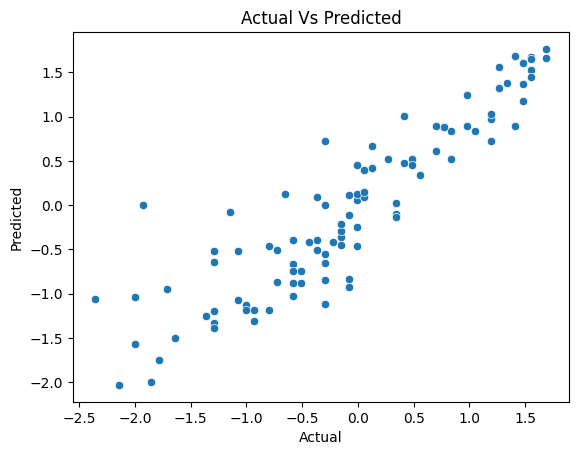

In [65]:
sns.scatterplot(x = y_test, y = Linear_pred)
plt.title('Actual Vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Multicolinearity and Varian Inflation Factor(VIF)

In [66]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

VIF for all the columns

In [67]:
X = scaled_df.iloc[:,:]
calc_vif(X)

,variables,VIF
0,GRE Score,4.464249
1,TOEFL Score,3.904213
2,University Rating,2.621036
3,SOP,2.835210
4,LOR,2.033555
5,CGPA,4.777992
6,Research,1.494008


#Homoskedasticity Test

In [68]:
from statsmodels.stats.diagnostic import het_goldfeldquandt
gq_test = het_goldfeldquandt(y_train, sm_data)
gq_test

(0.9506884043302329, 0.6367845922443056, 'increasing')

In [69]:
print('Goldfeld-Quandt Test Statistic:', gq_test[0])
print('p-value:', gq_test[1])
print('Alternative Hypothesis:', gq_test[2])

Goldfeld-Quandt Test Statistic: 0.9506884043302329
p-value: 0.6367845922443056
Alternative Hypothesis: increasing


In [70]:
residuals = res.resid
residuals

,0
249,-0.164517
433,-0.248786
19,-0.170322
322,0.335124
332,0.702515
...,...
106,0.035048
270,0.507500
348,0.731647
435,-0.270873


#Scatter plot for Predicted Values and Residuals

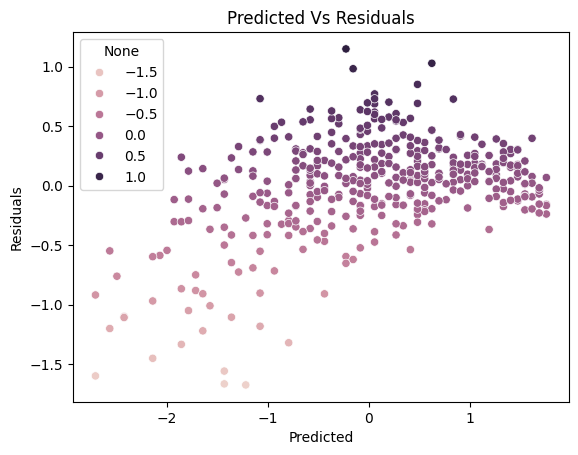

In [71]:
sns.scatterplot(x = y_train, y = residuals, hue= residuals)
plt.title('Predicted Vs Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

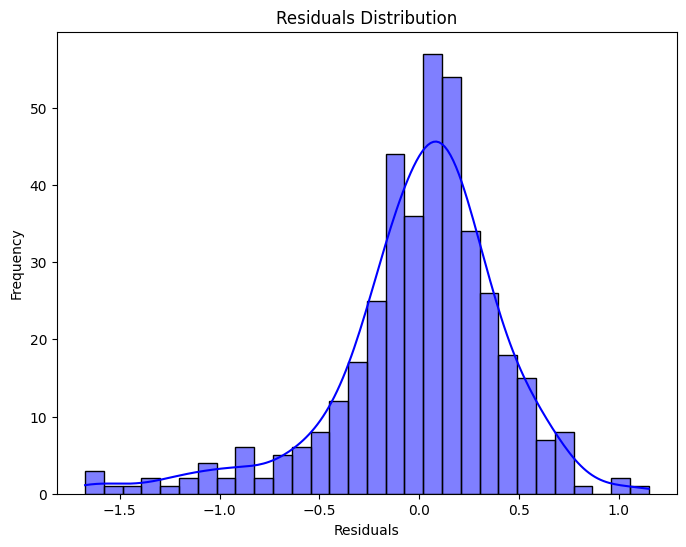

In [72]:
#Plotting Normality or bell shaped curve for residuals

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True,bins = 30, color='blue')

plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

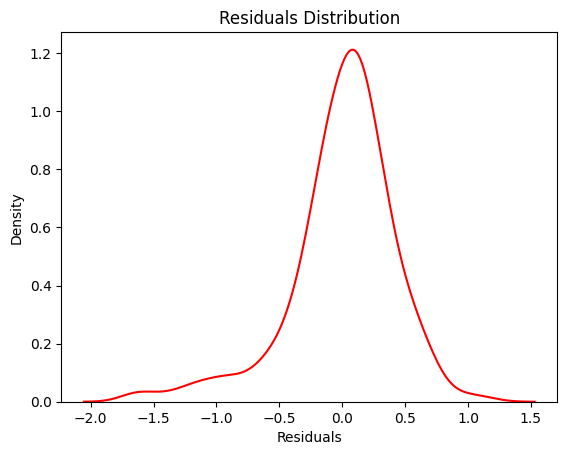

In [73]:
sns.kdeplot(residuals, color='red')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

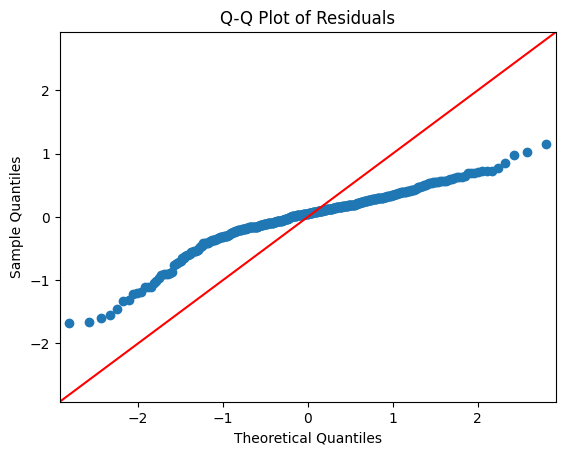

In [74]:
#Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

Calculating Adjusted R2 Score

In [75]:
#Adjusted r_score
adj_r2 = 1 - (1-r_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r2

0.8156083149398013

In [76]:
r_score,adj_r2

(0.8188432567829628, 0.8156083149398013)

In [77]:
MSE,MAE

(0.18634363515918578, 0.30299928245468516)

In [78]:
cor_matrix = scaled_df.corr(method= 'pearson')

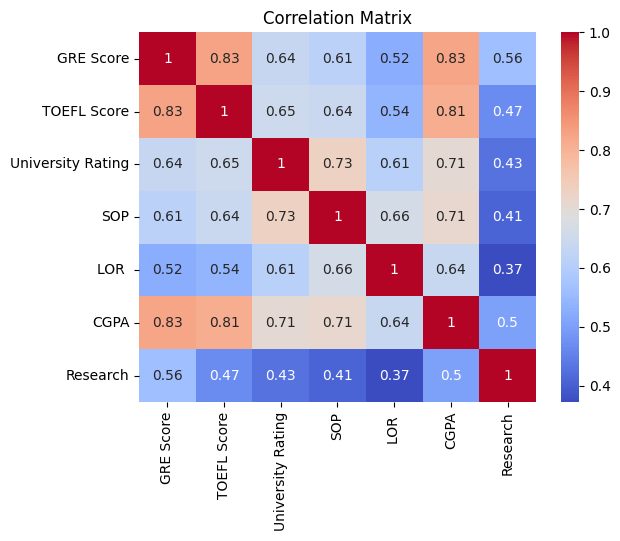

In [79]:
sns.heatmap(cor_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

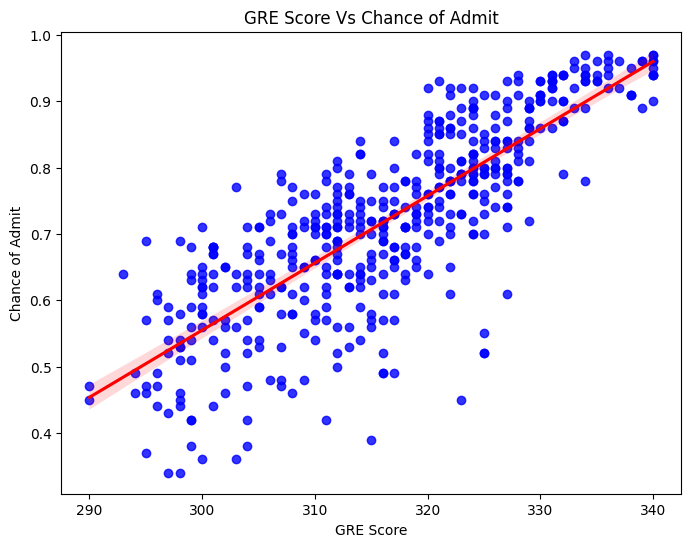

In [80]:
# Create a regression plot for GRE Score and Chance of Admit
plt.figure(figsize=(8,6))
sns.regplot(x=df['GRE Score'], y=df['Chance of Admit '], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('GRE Score Vs Chance of Admit')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.show()

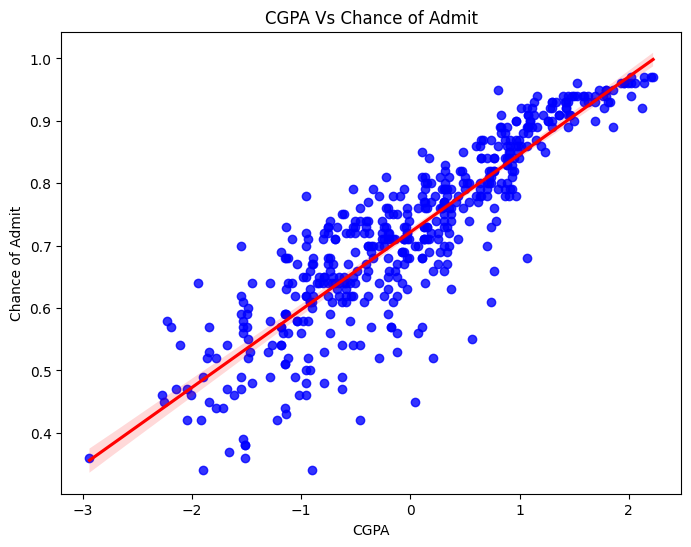

In [81]:
# Create a regression plot for GRE Score and Chance of Admit
plt.figure(figsize=(8,6))
sns.regplot(x=scaled_df['CGPA'], y=df['Chance of Admit '], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f'CGPA Vs Chance of Admit')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.show()

Traning Score and Testing Score to check if model is overfitting or underfitting

In [82]:
train_score = Linear.score(X_train, y_train)
test_score = Linear.score(X_test, y_test)
print("Training Score:", train_score)
print("Testing Score:", test_score)

Training Score: 0.8210671369321554
Testing Score: 0.8188432567829628


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [84]:
X_train, X_test, y_train, y_test

(     GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA  \
 249   0.401282     0.626751          -0.099793  0.127271  0.558125  0.419657   
 433  -0.041830     0.626751           0.775582  0.632315  1.639763 -0.060310   
 19   -1.193919    -0.854540          -0.099793  0.127271 -0.523513 -0.126513   
 322  -0.219074    -0.031601          -0.975168 -0.882817  0.558125 -0.507177   
 332  -0.750808    -0.196189          -0.099793  0.127271 -1.064332 -0.606480   
 ..         ...          ...                ...       ...       ...       ...   
 106   1.110260     0.626751           0.775582  1.137360  1.098944  0.998928   
 270  -0.928052    -0.360777          -0.975168 -0.882817 -0.523513 -0.589930   
 348  -1.282541    -1.348304          -1.850542 -1.387862 -1.605151 -2.195338   
 435  -0.662185    -0.360777          -0.975168 -0.882817  0.558125 -1.483662   
 102  -0.219074    -0.196189          -0.975168  0.632315  0.017306 -0.540278   
 
      Research  
 249  0.8

In [85]:
def adj_r2(X, y , r2_score):
  return 1 - ((1-r2_score)* (len(y)-1))/ (len(y) - X.shape[1] - 1 )

Regularisation and Hyperparameter turning

In [86]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
max_degree = 11
train_scores = []
test_scores = []
scaler = StandardScaler()

for degree in range(1, max_degree):
  polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, Ridge())

  polyreg_scaled.fit(X_train, y_train)
  train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
  test_score = adj_r2(X_test, y_test, polyreg_scaled.score(X_test, y_test))
  train_scores.append(train_score)
  test_scores.append(test_score)

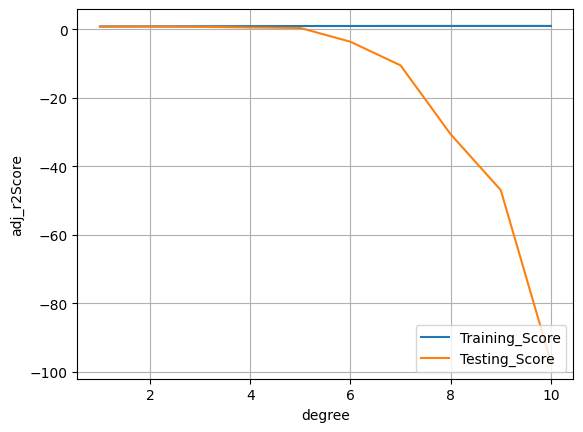

In [87]:
plt.figure()
plt.plot(list(range(1,11)), train_scores, label = 'Training_Score')
plt.plot(list(range(1,11)), test_scores, label = 'Testing_Score')
plt.legend(loc = 'lower right')
plt.xlabel('degree')
plt.ylabel('adj_r2Score')
plt.grid()
plt.show()

In [88]:
Eval_score = pd.DataFrame({'Training_Score': train_scores, 'Testing_Score': test_scores})
Eval_score

,Training_Score,Testing_Score
0,0.817868,0.805001
1,0.832842,0.812862
2,0.866962,0.695741
3,0.908757,0.522585
4,0.940644,0.372241
5,0.956056,-3.641494
6,0.964411,-10.544944
7,0.968923,-30.636293
8,0.971860,-46.938772
9,0.973913,-97.061326


Hyperparameter turning using lambda values using Ridge (L2 Regularisation)

In [89]:
train_scores = []
test_scores = []
rate_list = [0.0001, 0.001, 0.01, 0.1, 1, 10]
scaler = StandardScaler()

for rate in rate_list:
  polyreg_scaled = make_pipeline(PolynomialFeatures(2), scaler, Ridge(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)
  train_score = polyreg_scaled.score(X_train, y_train)
  test_score= polyreg_scaled.score(X_test, y_test)
  train_scores.append(train_score)
  test_scores.append(test_score)

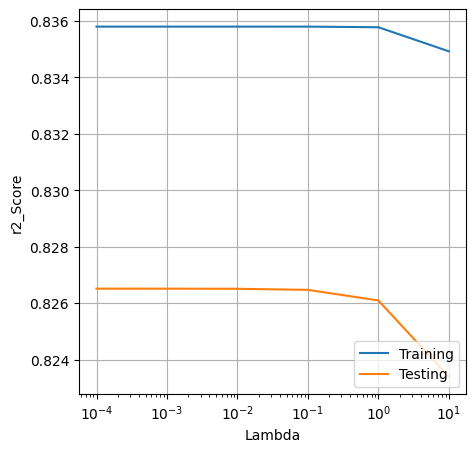

In [90]:
plt.figure(figsize=(5,5))
plt.plot(rate_list, train_scores, label = "Training")
plt.plot(rate_list, test_scores, label = "Testing")
plt.legend(loc = 'lower right')
plt.xlabel('Lambda')
plt.ylabel('r2_Score')
plt.xscale("log")
plt.grid()
plt.show()

Finding best lambda values based on the test scores

In [91]:
print("Best Lambda: ", rate_list[np.argmax(test_scores)])

Best Lambda:  0.0001


In [95]:
coefficients = Linear.coef_
coefficients

array([0.19482262, 0.12909489, 0.02081226, 0.01273465, 0.11302848,
       0.48219942, 0.08458618])

In [98]:
coefficients_list = coefficients.tolist()
coefficients_list

[0.19482261707795898,
 0.12909489317321993,
 0.020812258228495556,
 0.012734648047769803,
 0.11302847510583158,
 0.4821994209242439,
 0.08458618444739473]

In [100]:
new_coef_list = pd.DataFrame({'Features': X_train.columns, 'Coefficients': coefficients_list})
new_coef_list

,Features,Coefficients
0,GRE Score,0.194823
1,TOEFL Score,0.129095
2,University Rating,0.020812
3,SOP,0.012735
4,LOR,0.113028
5,CGPA,0.482199
6,Research,0.084586


#Insights and Recommendations

*   High GRE and TOEFL scores appear to be critical in determining the probability of admission, as they reflect a student’s academic potential and English language proficiency.
*   A higher university rating seems to correlate positively with a better chance of admission. Partnering with or focusing on applications to higher-rated universities could improve student success rates.
*   The Statement of Purpose (SOP) and Letter of Recommendation (LOR) scores are based on subjective evaluations but play a significant role in admissions. Students with stronger SOPs and LORs are more likely to be admitted.
*   A high Cumulative GPA (CGPA) is a strong predictor of a higher admission probability, showing academic consistency and dedication.
*   Research experience (denoted by the binary variable 0 or 1) significantly increases the chances of admission, especially for graduate programs.
*   The "Chance of Admit" column provides a clear metric for assessing how well each student’s profile aligns with admission criteria. Analyzing this helps identify thresholds or tipping points for each factor (e.g., GRE score of 320+, research experience, etc.) that significantly impact the chances of getting admitted.
*   The coefficients from the Linear Regression model reveal the impact of each feature on the Chance of Admit. As CGPA has higher coefficient means that the feature has a more significant influence on the admission probability.
*   Positive coefficients (e.g., GRE Score, CGPA) indicate that higher values in these variables improve the probability of admission.
*   LOR has third highest coefficient that indicates it is important after CPGA, GRE and TOEFL score.   

Model Performance Metrics:
R-Squared (R² Score):
- The R² score indicates how well the independent variables (CGPA, GRE, TOEFL, ) explain the variance in the dependent variable (Chance of Admit).
Interpretation:
- An R² score close to 1 means the model fits the data well, meaning most of the variance in admission chances can be explained by the input features.
Recommendation:
- If the R² score is high, Jamboree can be confident in using the model to predict admission chances.
Mean Absolute Error (MAE) / Mean Squared Error (MSE):
- These metrics represent the average magnitude of errors between the predicted and actual values.
- MAE provides the average absolute difference between predictions and actual outcomes.
MSE squares these differences, giving more weight to larger errors.
Interpretation:
- Lower error values indicate that the model's predictions are more accurate.
Recommendation:
- Jamboree should refine the model by possibly incorporating interaction terms (e.g., between SOP and LOR) or exploring more complex models (e.g., decision trees, random forests).

Actionable Recommendations Based on Model Insights:
- Focus on High Impact Factors: Based on the regression coefficients, Jamboree can prioritize GRE, CGPA, and Research opportunities in their counseling services, as these may have the highest impact on admissions.
- Adapt Predictions for Different Profiles: Use residual analysis and feature importance to guide students with varying profiles (e.g., those with weaker GRE scores but strong research and SOP) on how to enhance their overall application strategy.













